# Error Comparison for CIGRE MV with PV Inverters and Load Step

## Read reference results

In [1]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
import matplotlib.pyplot as plt
import re
%matplotlib widget

model_name = 'CIGRE_MV_withDG_withLoadStep'

path_ref = 'logs/' + 'EMT_' + model_name + '_0.000050/'
dpsim_result_file_ref = path_ref  + 'EMT_' + model_name + '_0.000050' + '.csv'
ts_dpsim_ref = read_timeseries_csv(dpsim_result_file_ref)

column number: 119
results length: 100001
real column names: ['L1-2.I_0', 'L1-2.I_1', 'L1-2.I_2', 'L10-9.I_0', 'L10-9.I_1', 'L10-9.I_2', 'L11-10.I_0', 'L11-10.I_1', 'L11-10.I_2', 'L2-3.I_0', 'L2-3.I_1', 'L2-3.I_2', 'L3-4.I_0', 'L3-4.I_1', 'L3-4.I_2', 'L3-8.I_0', 'L3-8.I_1', 'L3-8.I_2', 'L4-5.I_0', 'L4-5.I_1', 'L4-5.I_2', 'L5-6.I_0', 'L5-6.I_1', 'L5-6.I_2', 'L7-8.I_0', 'L7-8.I_1', 'L7-8.I_2', 'L8-9.I_0', 'L8-9.I_1', 'L8-9.I_2', 'LOAD-H-10.I_0', 'LOAD-H-10.I_1', 'LOAD-H-10.I_2', 'LOAD-H-11.I_0', 'LOAD-H-11.I_1', 'LOAD-H-11.I_2', 'LOAD-H-3.I_0', 'LOAD-H-3.I_1', 'LOAD-H-3.I_2', 'LOAD-H-4.I_0', 'LOAD-H-4.I_1', 'LOAD-H-4.I_2', 'LOAD-H-5.I_0', 'LOAD-H-5.I_1', 'LOAD-H-5.I_2', 'LOAD-H-6.I_0', 'LOAD-H-6.I_1', 'LOAD-H-6.I_2', 'LOAD-H-8.I_0', 'LOAD-H-8.I_1', 'LOAD-H-8.I_2', 'LOAD-I-10.I_0', 'LOAD-I-10.I_1', 'LOAD-I-10.I_2', 'LOAD-I-3.I_0', 'LOAD-I-3.I_1', 'LOAD-I-3.I_2', 'LOAD-I-7.I_0', 'LOAD-I-7.I_1', 'LOAD-I-7.I_2', 'LOAD-I-9.I_0', 'LOAD-I-9.I_1', 'LOAD-I-9.I_2', 'N0.V_0', 'N0.V_1', 'N0.V_2', 'N

## Read simulation results

In [2]:
timestep_vec = np.concatenate((np.arange(100e-6,1000e-6,200e-6),np.arange(1e-3,21e-3,1e-3)))

timestep_str_list = []
for timestep in timestep_vec:
    timestep_str_list.append('{:1.6f}'.format(timestep))
print(timestep_str_list)

['0.000100', '0.000300', '0.000500', '0.000700', '0.000900', '0.001000', '0.002000', '0.003000', '0.004000', '0.005000', '0.006000', '0.007000', '0.008000', '0.009000', '0.010000', '0.011000', '0.012000', '0.013000', '0.014000', '0.015000', '0.016000', '0.017000', '0.018000', '0.019000', '0.020000']


In [3]:
ts_dpsim_DP = {}
ts_dpsim_EMT = {}
for timestep_str in timestep_str_list:
    model_name_timestep = model_name + '_' + timestep_str
    path_DP = 'logs/' + 'DP_' + model_name_timestep + '/'
    dpsim_result_file_DP = path_DP  + 'DP_' + model_name_timestep + '.csv'
    ts_dpsim_DP[timestep_str] = read_timeseries_csv(dpsim_result_file_DP)
    path_EMT = 'logs/' + 'EMT_' + model_name_timestep + '/'
    dpsim_result_file_EMT = path_EMT  + 'EMT_' + model_name_timestep + '.csv'
    ts_dpsim_EMT[timestep_str] = read_timeseries_csv(dpsim_result_file_EMT)

column number: 49
results length: 50000
real column names: ['pv_N11_input_Ircdq_0', 'pv_N11_input_Ircdq_1', 'pv_N11_input_Vcdq_0', 'pv_N11_input_Vcdq_1', 'pv_N11_output_Vsdq_0', 'pv_N11_output_Vsdq_1', 'pv_N11_state_gammad', 'pv_N11_state_gammaq', 'pv_N11_state_p', 'pv_N11_state_phid', 'pv_N11_state_phipll', 'pv_N11_state_phiq', 'pv_N11_state_q', 'pv_N11_state_theta']
complex column names: ['L1-2.I', 'L10-9.I', 'L11-10.I', 'L2-3.I', 'L3-4.I', 'L3-8.I', 'L4-5.I', 'L5-6.I', 'L7-8.I', 'L8-9.I', 'LOAD-H-10.I', 'LOAD-H-11.I', 'LOAD-H-3.I', 'LOAD-H-4.I', 'LOAD-H-5.I', 'LOAD-H-6.I', 'LOAD-H-8.I', 'LOAD-I-10.I', 'LOAD-I-3.I', 'LOAD-I-7.I', 'LOAD-I-9.I', 'N0.V', 'N1.V', 'N10.V', 'N11.V', 'N2.V', 'N3.V', 'N4.V', 'N5.V', 'N6.V', 'N7.V', 'N8.V', 'N9.V', 'pv_N11_i_intf', 'pv_N11_v_intf']
column number: 119
results length: 50000
real column names: ['L1-2.I_0', 'L1-2.I_1', 'L1-2.I_2', 'L10-9.I_0', 'L10-9.I_1', 'L10-9.I_2', 'L11-10.I_0', 'L11-10.I_1', 'L11-10.I_2', 'L2-3.I_0', 'L2-3.I_1', 'L2-3.I_2', 

## Voltage Errors

In [4]:
volt_var_name = 'N11.V'

volt_emt_errors = []
volt_dp_errors = []
for timestep_str in timestep_str_list:
    # RMSE
    volt_emt_errors.append(ts_dpsim_ref[volt_var_name+'_0'].rmse(ts_dpsim_EMT[timestep_str][volt_var_name+'_0'].interpolate(50e-6),ts_dpsim_ref[volt_var_name+'_0'].interpolate(50e-6)))
    ts_DP_backshift = TimeSeries(volt_var_name + '_DP_backshift',ts_dpsim_DP[timestep_str][volt_var_name].interpolate(50e-6).time,np.sqrt(2/3)*ts_dpsim_DP[timestep_str][volt_var_name].interpolate(50e-6).frequency_shift(50).values)
    volt_dp_errors.append(ts_dpsim_ref[volt_var_name+'_0'].rmse(ts_DP_backshift,ts_dpsim_ref[volt_var_name+'_0'].interpolate(50e-6)))
    # MEA
    #volt_emt_errors.append(np.mean(ts_dpsim_ref[volt_var_name+'_0'].diff(volt_var_name+'EMT_diff',ts_dpsim_EMT[timestep_str][volt_var_name+'_0'],ts_dpsim_ref[volt_var_name+'_0']).abs().values))
    #ts_DP_backshift = TimeSeries(volt_var_name + '_DP_backshift',ts_dpsim_DP[timestep_str][volt_var_name].interpolate(50e-6).time,np.sqrt(2/3)*ts_dpsim_DP[timestep_str][volt_var_name].interpolate(50e-6).frequency_shift(50).values)
    #volt_dp_errors.append(np.mean(ts_dpsim_ref[volt_var_name+'_0'].diff(volt_var_name+'DP_diff',ts_DP_backshift,ts_dpsim_ref[volt_var_name+'_0']).abs().values))

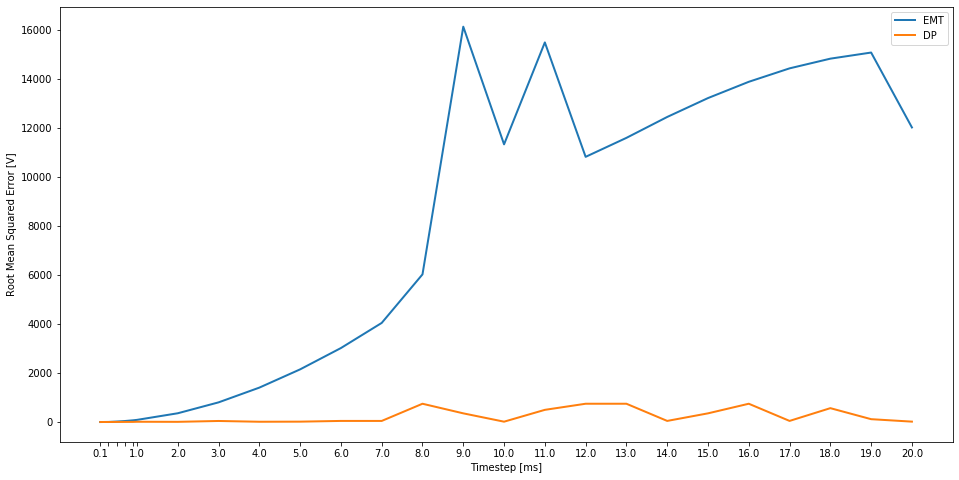

In [5]:
xticks_str_list = []
for timestep in timestep_vec:
    xticks_str_list.append('{:1.1f}'.format(timestep*1000))
xticks_str_list[1] = ''
xticks_str_list[2] = ''
xticks_str_list[3] = ''
xticks_str_list[4] = ''
    
plt.figure(figsize=(16,8))
plt.plot(timestep_vec, volt_emt_errors, label='EMT', linewidth=2)
plt.plot(timestep_vec, volt_dp_errors, label='DP', linewidth=2)
ax = plt.gca()
ax.set_xticks(timestep_vec)
ax.set_xticklabels(xticks_str_list)
plt.ylabel('Root Mean Squared Error [V]')
plt.xlabel('Timestep [ms]')
plt.legend()
plt.show()

## Current Errors

In [6]:
curr_var_name = 'L11-10.I'

curr_emt_errors = []
curr_dp_errors = []
for timestep_str in timestep_str_list:
    # RMSE
    curr_emt_errors.append(ts_dpsim_ref[curr_var_name+'_0'].rmse(ts_dpsim_EMT[timestep_str][curr_var_name+'_0'].interpolate(50e-6),ts_dpsim_ref[curr_var_name+'_0'].interpolate(50e-6)))
    ts_DP_backshift = TimeSeries(curr_var_name + '_DP_backshift',ts_dpsim_DP[timestep_str][curr_var_name].interpolate(50e-6).time,np.sqrt(2/3)*ts_dpsim_DP[timestep_str][curr_var_name].interpolate(50e-6).frequency_shift(50).values)
    curr_dp_errors.append(ts_dpsim_ref[curr_var_name+'_0'].rmse(ts_DP_backshift,ts_dpsim_ref[curr_var_name+'_0'].interpolate(50e-6)))
    # MEA
    #curr_emt_errors.append(np.mean(ts_dpsim_ref[curr_var_name+'_0'].diff(curr_var_name+'EMT_diff',ts_dpsim_EMT[timestep_str][curr_var_name+'_0'],ts_dpsim_ref[curr_var_name+'_0']).abs().values))
    #ts_DP_backshift = TimeSeries(curr_var_name + '_DP_backshift',ts_dpsim_DP[timestep_str][curr_var_name].interpolate(50e-6).time,np.sqrt(2/3)*ts_dpsim_DP[timestep_str][curr_var_name].interpolate(50e-6).frequency_shift(50).values)
    #curr_dp_errors.append(np.mean(ts_dpsim_ref[curr_var_name+'_0'].diff(curr_var_name+'DP_diff',ts_DP_backshift,ts_dpsim_ref[curr_var_name+'_0']).abs().values))

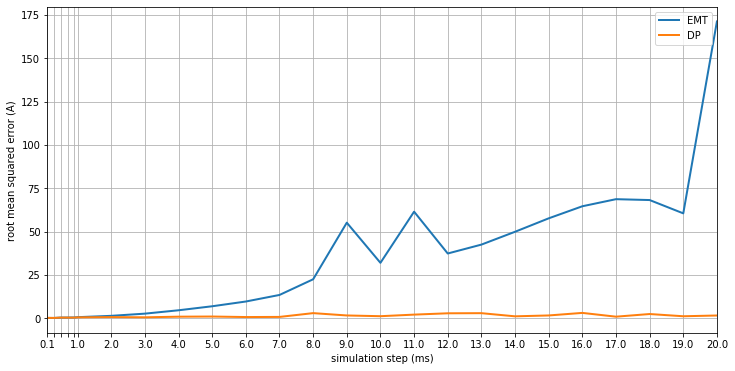

In [17]:
plt.figure(figsize=(12,6))
plt.plot(timestep_vec, curr_emt_errors, label='EMT', linewidth=2)
plt.plot(timestep_vec, curr_dp_errors, label='DP', linewidth=2)
ax = plt.gca()
ax.set_xticks(timestep_vec)
ax.set_xticklabels(xticks_str_list)
plt.ylabel('root mean squared error (A)')
plt.xlabel('simulation step (ms)')
plt.legend()
plt.xlim([0.0001, 0.020000])
plt.grid(True)
plt.savefig('line_current_load_step_error.svg')
plt.savefig('line_current_load_step_error.pdf')
plt.show()